In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from matplotlib import pyplot as plt
import numpy as np

In [10]:
## Part I data initial cleaning and transformation
data = pd.read_csv("Historical_Property_Assessments__Parcel__20240303.csv")
display(data.head())
d1 = data[['ASSESSED_VALUE','ASSESSMENT_CLASS','COMM_CODE','COMM_NAME','LAND_SIZE_SM','LAND_USE_DESIGNATION']]
display(d1.head())
print(d1.shape)
d2 = d1[d1['ASSESSED_VALUE'].notna()]
print(d2.shape)
d2 = d2[d2['LAND_SIZE_SM'].notna()]
d2 = d2[d2['LAND_USE_DESIGNATION'].notna()]
print(d2.shape)
display(d2.head())

labels = data['LAND_USE_DESIGNATION'].unique()
labels = list(labels[1:])
re_labels = ['R-1','R-1N','R-C2','R-2','R-C1N']
re_la = []
for s in labels:
    if (s[0] == 'R') & (len(s)<=5) :
        re_la.append(s)

print(re_la)

dre = d2[d2['LAND_USE_DESIGNATION'].isin(re_la)][['ASSESSED_VALUE','ASSESSMENT_CLASS','COMM_CODE','LAND_SIZE_SM']]
display(dre.head())
dre.to_csv("Property_Assessment_after_cleaning.csv",index=False)

,ROLL_YEAR,ROLL_NUMBER,ADDRESS,ASSESSED_VALUE,ASSESSMENT_CLASS,ASSESSMENT_CLASS_DESCRIPTION,RE_ASSESSED_VALUE,NR_ASSESSED_VALUE,FL_ASSESSED_VALUE,COMM_CODE,COMM_NAME,YEAR_OF_CONSTRUCTION,LAND_USE_DESIGNATION,PROPERTY_TYPE,LAND_SIZE_SM,LAND_SIZE_SF,LAND_SIZE_AC,SUB_PROPERTY_USE,MULTIPOLYGON
0,2019,23152127,5922 TROLLINGER ST NE,332500.0,RE,Residential,332500.0,NaN,NaN,THO,THORNCLIFFE,NaN,NaN,LI,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-114.0592693 51.1035716, -114...."
1,2019,4032504,52 SADDLEBACK WY NE,360000.0,RE,Residential,360000.0,NaN,NaN,SAD,SADDLE RIDGE,NaN,R-1N,LI,310.0,3337.0,0.08,NaN,"MULTIPOLYGON (((-113.9490855 51.1277451, -113...."
2,2019,4032603,48 SADDLEBACK WY NE,366000.0,RE,Residential,366000.0,NaN,NaN,SAD,SADDLE RIDGE,NaN,R-1N,LI,391.4,4214.0,0.10,NaN,"MULTIPOLYGON (((-113.9492072 51.1277092, -113...."
3,2019,4032702,10 SADDLEBACK RD NE,404000.0,RE,Residential,404000.0,NaN,NaN,SAD,SADDLE RIDGE,NaN,R-1N,LI,340.0,3659.0,0.08,NaN,"MULTIPOLYGON (((-113.9505519 51.1280999, -113...."
4,2019,4032801,14 SADDLEBACK RD NE,385500.0,RE,Residential,385500.0,NaN,NaN,SAD,SADDLE RIDGE,NaN,R-1N,LI,347.5,3741.0,0.09,NaN,"MULTIPOLYGON (((-113.9504361 51.1281539, -113...."


,ASSESSED_VALUE,ASSESSMENT_CLASS,COMM_CODE,COMM_NAME,LAND_SIZE_SM,LAND_USE_DESIGNATION
0,332500.0,RE,THO,THORNCLIFFE,NaN,NaN
1,360000.0,RE,SAD,SADDLE RIDGE,310.0,R-1N
2,366000.0,RE,SAD,SADDLE RIDGE,391.4,R-1N
3,404000.0,RE,SAD,SADDLE RIDGE,340.0,R-1N
4,385500.0,RE,SAD,SADDLE RIDGE,347.5,R-1N


(545370, 6)
(545361, 6)
(545281, 6)


,ASSESSED_VALUE,ASSESSMENT_CLASS,COMM_CODE,COMM_NAME,LAND_SIZE_SM,LAND_USE_DESIGNATION
1,360000.0,RE,SAD,SADDLE RIDGE,310.0,R-1N
2,366000.0,RE,SAD,SADDLE RIDGE,391.4,R-1N
3,404000.0,RE,SAD,SADDLE RIDGE,340.0,R-1N
4,385500.0,RE,SAD,SADDLE RIDGE,347.5,R-1N
5,395000.0,RE,SAD,SADDLE RIDGE,317.6,R-1N


['R-1N', 'R-1s', 'R-2', 'R-C2', 'R-1', 'R-C1', 'R-C1N', 'R-2M', 'R-C1s', 'R-MH', 'R-CG', 'R-C1L', 'RF', 'R-G', 'R-Gm']


,ASSESSED_VALUE,ASSESSMENT_CLASS,COMM_CODE,LAND_SIZE_SM
1,360000.0,RE,SAD,310.0
2,366000.0,RE,SAD,391.4
3,404000.0,RE,SAD,340.0
4,385500.0,RE,SAD,347.5
5,395000.0,RE,SAD,317.6


In [13]:
## Part II queries using SQL

SELECT DISTINCT COMM_CODE,COMM_NAME FROM property_assessment_new;

Comments:

This query retrieves all unique community codes and names from the 2019 property assessment table. Our project focuses on community-level property price analysis, with community code and name being the primary keys for identifying housing prices and merging various factors like crime rate, disorder, public services, and demographic distribution. Based on this query's results and data availability, we will also perform community data cleaning and selection.

select COMM_CODE, COMM_NAME,avg(LAND_SIZE_SF) as AVG_SIZE from property_assessment_new

WHERE ASSESSMENT_CLASS = 'RE'

group by COMM_CODE

order by AVG_SIZE desc;


Comments:

This query examines the average residential property size (in square feet) across all communities. Property size is a crucial consideration for homebuyers, and this information can provide valuable insights into the spatial distribution of average property sizes in Calgary, which we can use in our price analysis.


select COMM_NAME,COMM_CODE,avg(ASSESSED_VALUE/LAND_SIZE_SF) as AVG_RE from property_assessment_new

WHERE ASSESSMENT_CLASS = 'RE'

group by COMM_CODE

order by AVG_RE desc;


Comments:

This query investigates the average residential property unit price (per square foot) for all communities. In addition to size, the unit price is a critical metric for representing property prices. We can compare total property prices and unit prices across communities, determining if any discrepancies exist and choosing one or both for further analysis.

select COMM_NAME,COMM_CODE,avg(ASSESSED_VALUE/LAND_SIZE_SF) as AVG_NR from property_assessment_new

WHERE ASSESSMENT_CLASS = 'NR'

group by COMM_CODE

order by AVG_NR desc;


Comments:

This query determines the average non-residential property unit price across all communities. While our project primarily focuses on residential properties, non-residential properties (business or industrial) may exhibit different pricing patterns, which is another area of interest for our study.

select COMM_NAME,COMM_CODE,avg(ASSESSED_VALUE/LAND_SIZE_SF) as AVG_FL from property_assessment_new

WHERE ASSESSMENT_CLASS = 'FL'

group by COMM_CODE

order by AVG_FL desc;


Comments:

This query displays the average farmland unit price for each community. Notably, only 21 communities have farmland properties. Although farmland may not be the central focus of our project, we still aim to explore potential factors affecting farmland prices.

,ASSESSED_VALUE,LAND_SIZE_SM
COMM_CODE,,
12A,295333.333333,1585.433333
ABB,302865.032487,399.142056
ACA,433786.875000,532.586833
ALB,345562.785388,471.276712
ALT,959873.212930,425.386198


,ASSESSED_VALUE,LAND_SIZE_SM
COMM_CODE,,
01B,9.111136e+06,129293.286364
01C,9.862511e+05,33792.889189
01D,5.429500e+05,17327.340000
01F,2.596625e+06,215204.175000
01G,1.318908e+07,691219.050000


,ASSESSED_VALUE,LAND_SIZE_SM
COMM_CODE,,
01B,10790.000000,124800.000000
01C,1460.000000,16920.000000
01G,18662.000000,410188.000000
01H,10756.666667,512461.400000
02K,31241.111111,634760.966667


,CLASS,CLASS_CODE,NAME,SECTOR,SRG,COMM_STRUCTURE,CREATED_DT,MODIFIED_DT,MULTIPOLYGON,RE_VALUE,RE_AREA,RE_UNIT_PRICE,NR_VALUE,NR_AREA,NR_UNIT_PRICE,FL_VALUE,FL_AREA,FL_UNIT_PRICE
COMM_CODE,,,,,,,,,,,,,,,,,,
LEB,Residential,1,LEWISBURG,NORTH,DEVELOPING,BUILDING OUT,2016/12/21,2019/11/26,"MULTIPOLYGON (((-114.0480237 51.1749865, -114....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSC,Residential,1,CITYSCAPE,NORTHEAST,DEVELOPING,BUILDING OUT,2016/12/21,2016/12/21,"MULTIPOLYGON (((-113.9524996 51.1543075, -113....",NaN,NaN,NaN,7.990733e+05,8946.160000,89.320260,46500.0,538807.800000,0.086302
ST1,Industrial,2,STONEY 1,NORTH,NaN,EMPLOYMENT,2016/12/21,2016/12/21,"MULTIPOLYGON (((-114.0133015 51.1744266, -114....",NaN,NaN,NaN,3.762448e+06,42516.007432,88.494853,5995.0,69340.600000,0.086457
MRT,Residential,1,MARTINDALE,NORTHEAST,ESTABLISHED,1980s/1990s,2016/12/21,2020/10/22,"MULTIPOLYGON (((-113.9648991 51.1251901, -113....",357670.256835,338.426125,1056.863611,4.542956e+06,11323.700000,401.190031,NaN,NaN,NaN
ST2,Industrial,2,STONEY 2,NORTHEAST,NaN,EMPLOYMENT,2016/12/21,2016/12/21,"MULTIPOLYGON (((-113.9939281 51.153327, -113.9...",NaN,NaN,NaN,9.312767e+06,43137.953425,215.883378,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EVE,Residential,1,EVERGREEN,SOUTH,COMPLETE,2000s,2016/12/21,2024/02/21,"MULTIPOLYGON (((-114.1103197 50.9213405, -114....",523774.421480,449.614238,1164.941805,7.627533e+05,5202.954610,146.600036,NaN,NaN,NaN
S23,Industrial,2,SECTION 23,SOUTHEAST,NaN,EMPLOYMENT,2016/12/21,2024/02/21,"MULTIPOLYGON (((-113.9344851 50.9795898, -113....",NaN,NaN,NaN,5.391651e+06,24984.454167,215.800233,6030.0,69746.666667,0.086456
13A,Residual Sub Area,4,13A,SOUTH,FUTURE,UNDEVELOPED,2016/12/21,2024/02/21,"MULTIPOLYGON (((-114.2097933 50.9068097, -114....",NaN,NaN,NaN,NaN,NaN,NaN,23070.0,402681.600000,0.057291


,COMM_CODE,CLASS,CLASS_CODE,NAME,SECTOR,SRG,COMM_STRUCTURE,CREATED_DT,MODIFIED_DT,MULTIPOLYGON,RE_VALUE,RE_AREA,RE_UNIT_PRICE,NR_VALUE,NR_AREA,NR_UNIT_PRICE,FL_VALUE,FL_AREA,FL_UNIT_PRICE
0,LEB,Residential,1,LEWISBURG,NORTH,DEVELOPING,BUILDING OUT,2016/12/21,2019/11/26,"MULTIPOLYGON (((-114.0480237 51.1749865, -114....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CSC,Residential,1,CITYSCAPE,NORTHEAST,DEVELOPING,BUILDING OUT,2016/12/21,2016/12/21,"MULTIPOLYGON (((-113.9524996 51.1543075, -113....",NaN,NaN,NaN,7.990733e+05,8946.160000,89.320260,46500.0,538807.800000,0.086302
2,ST1,Industrial,2,STONEY 1,NORTH,NaN,EMPLOYMENT,2016/12/21,2016/12/21,"MULTIPOLYGON (((-114.0133015 51.1744266, -114....",NaN,NaN,NaN,3.762448e+06,42516.007432,88.494853,5995.0,69340.600000,0.086457
3,MRT,Residential,1,MARTINDALE,NORTHEAST,ESTABLISHED,1980s/1990s,2016/12/21,2020/10/22,"MULTIPOLYGON (((-113.9648991 51.1251901, -113....",357670.256835,338.426125,1056.863611,4.542956e+06,11323.700000,401.190031,NaN,NaN,NaN
4,ST2,Industrial,2,STONEY 2,NORTHEAST,NaN,EMPLOYMENT,2016/12/21,2016/12/21,"MULTIPOLYGON (((-113.9939281 51.153327, -113.9...",NaN,NaN,NaN,9.312767e+06,43137.953425,215.883378,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,EVE,Residential,1,EVERGREEN,SOUTH,COMPLETE,2000s,2016/12/21,2024/02/21,"MULTIPOLYGON (((-114.1103197 50.9213405, -114....",523774.421480,449.614238,1164.941805,7.627533e+05,5202.954610,146.600036,NaN,NaN,NaN
308,S23,Industrial,2,SECTION 23,SOUTHEAST,NaN,EMPLOYMENT,2016/12/21,2024/02/21,"MULTIPOLYGON (((-113.9344851 50.9795898, -113....",NaN,NaN,NaN,5.391651e+06,24984.454167,215.800233,6030.0,69746.666667,0.086456
309,13A,Residual Sub Area,4,13A,SOUTH,FUTURE,UNDEVELOPED,2016/12/21,2024/02/21,"MULTIPOLYGON (((-114.2097933 50.9068097, -114....",NaN,NaN,NaN,NaN,NaN,NaN,23070.0,402681.600000,0.057291
310,CED,Residential,1,CEDARBRAE,SOUTH,ESTABLISHED,1960s/1970s,2016/12/21,2024/02/21,"MULTIPOLYGON (((-114.1412807 50.9517167, -114....",376742.557883,451.363396,834.676807,1.603655e+06,8998.342857,178.216677,NaN,NaN,NaN


COMM_CODE          object
CLASS              object
CLASS_CODE          int64
NAME               object
SECTOR             object
SRG                object
COMM_STRUCTURE     object
CREATED_DT         object
MODIFIED_DT        object
MULTIPOLYGON       object
RE_VALUE          float64
RE_AREA           float64
RE_UNIT_PRICE     float64
NR_VALUE          float64
NR_AREA           float64
NR_UNIT_PRICE     float64
FL_VALUE          float64
FL_AREA           float64
FL_UNIT_PRICE     float64
dtype: object

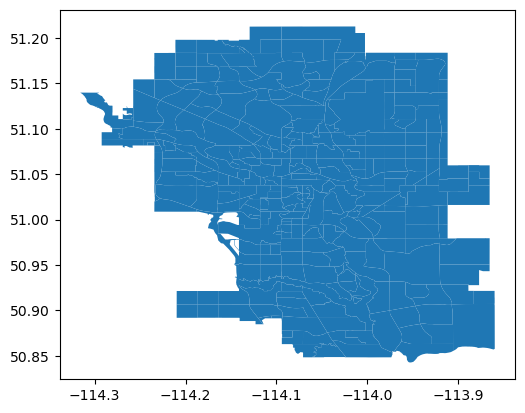

In [12]:
## Part III Result visulisation

dre_group = dre.groupby(['ASSESSMENT_CLASS','COMM_CODE']).mean()
dre_final = dre_group.loc['RE']

d3 = d2[['ASSESSED_VALUE','ASSESSMENT_CLASS','COMM_CODE','LAND_SIZE_SM']].groupby(['ASSESSMENT_CLASS','COMM_CODE']).mean()
dnr = d3.loc['NR']
dfl = d3.loc['FL']
display(dre_final.head())
display(dnr.head())
display(dfl.head())

df0 = pd.read_csv('Community_District_Boundaries_20240326 copy.csv')
df0['RE_VALUE'] = np.nan
df0['RE_AREA'] = np.nan
df0['RE_UNIT_PRICE'] = np.nan
df0['NR_VALUE'] = np.nan
df0['NR_AREA'] = np.nan
df0['NR_UNIT_PRICE'] = np.nan
df0['FL_VALUE'] = np.nan
df0['FL_AREA'] = np.nan
df0['FL_UNIT_PRICE'] = np.nan

# display(df0)
COMM_CODES = list(df0['COMM_CODE'])
df1 = df0.set_index('COMM_CODE')


for comm_code in dre_final.index:
    if comm_code in COMM_CODES:
        df1.loc[comm_code,'RE_VALUE'] = dre_final.loc[comm_code,'ASSESSED_VALUE']
        df1.loc[comm_code,'RE_AREA'] = dre_final.loc[comm_code,'LAND_SIZE_SM']

df1['RE_UNIT_PRICE'] = df1['RE_VALUE']/df1['RE_AREA']


for comm_code in dnr.index:
    if comm_code in COMM_CODES:
        df1.loc[comm_code,'NR_VALUE'] = dnr.loc[comm_code,'ASSESSED_VALUE']
        df1.loc[comm_code,'NR_AREA'] = dnr.loc[comm_code,'LAND_SIZE_SM']

df1['NR_UNIT_PRICE'] = df1['NR_VALUE']/df1['NR_AREA']


for comm_code in dfl.index:
    if comm_code in COMM_CODES:
        df1.loc[comm_code,'FL_VALUE'] = dfl.loc[comm_code,'ASSESSED_VALUE']
        df1.loc[comm_code,'FL_AREA'] = dfl.loc[comm_code,'LAND_SIZE_SM']

df1['FL_UNIT_PRICE'] = df1['FL_VALUE']/df1['FL_AREA']

display(df1)

df2 = df1.reset_index()
display(df2)
display(df2.dtypes)
df2.to_csv("property_price_merged_update.csv",index=False)

gdf = gpd.read_file('property_price_merged_update.csv')

gdf['MULTIPOLYGON'] = gdf['MULTIPOLYGON'].apply(wkt.loads)

# Create a GeoDataFrame from the 'MULTIPOLYGON' column
gdf = gpd.GeoDataFrame(gdf, geometry='MULTIPOLYGON')

# Plot the multipolygons
gdf.plot()

# Display the map
plt.show()

/Users/cesar/miniconda3/envs/geocat/lib/python3.11/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


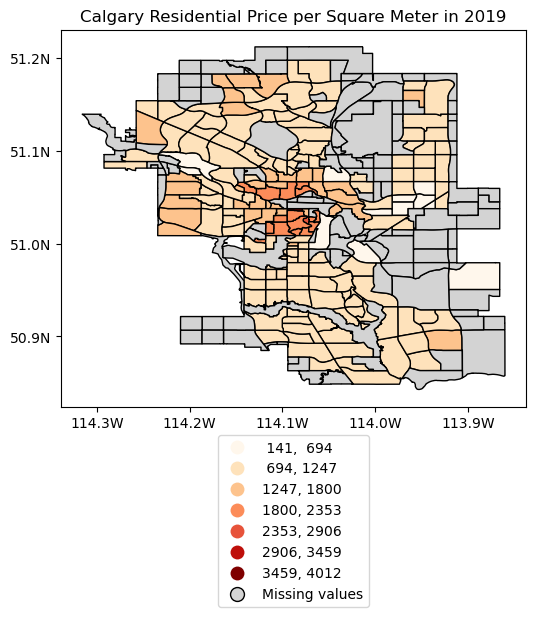

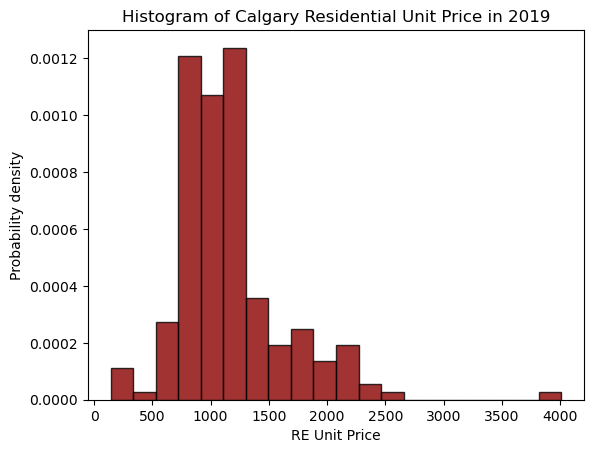

In [7]:
#RE Plot
gdf = gpd.read_file('property_price_merged_update.csv')

gdf['MULTIPOLYGON'] = gdf['MULTIPOLYGON'].apply(wkt.loads)

# Create a GeoDataFrame from the 'MULTIPOLYGON' column
gdf = gpd.GeoDataFrame(gdf, geometry='MULTIPOLYGON')
gdf[['RE_VALUE','RE_AREA','RE_UNIT_PRICE']] = df2[['RE_VALUE','RE_AREA','RE_UNIT_PRICE']]
gdf[['NR_VALUE','NR_AREA','NR_UNIT_PRICE']] = df2[['NR_VALUE','NR_AREA','NR_UNIT_PRICE']]
gdf[['FL_VALUE','FL_AREA','FL_UNIT_PRICE']] = df2[['FL_VALUE','FL_AREA','FL_UNIT_PRICE']]

# gdf1 = gdf
gdf1 = gdf
gdf1.loc[82,['RE_VALUE','RE_AREA','RE_UNIT_PRICE']] = np.nan

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6,8)
p = gdf1.plot(column="RE_UNIT_PRICE",ax=ax,edgecolor="k",cmap='OrRd',legend=True,scheme='equal_interval',k=7,
              missing_kwds={
        "color": "lightgrey",
        "edgecolor": "k",
        "label": "Missing values",
    },
    legend_kwds={"loc": "lower center", "bbox_to_anchor": (0.5, -0.55), "fmt": "{:.0f}"})
ax.set_xticks([-114.3,-114.2,-114.1,-114.0,-113.9],labels = ['114.3W','114.2W','114.1W','114.0W','113.9W'])
ax.set_yticks([50.9,51.0,51.1,51.2,],labels = ['50.9N','51.0N','51.1N','51.2N',])
ax.set_title('Calgary Residential Price per Square Meter in 2019')
plt.show()
fig.savefig('RE Unit price spatial distribution.png',dpi=400)

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(gdf1["RE_UNIT_PRICE"], 20, density=True,color='darkred',alpha=0.8,edgecolor='k')
ax.set_xlabel('RE Unit Price')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of Calgary Residential Unit Price in 2019')
fig.savefig('RE Unit price histogram.png',dpi=400)


/Users/cesar/miniconda3/envs/geocat/lib/python3.11/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


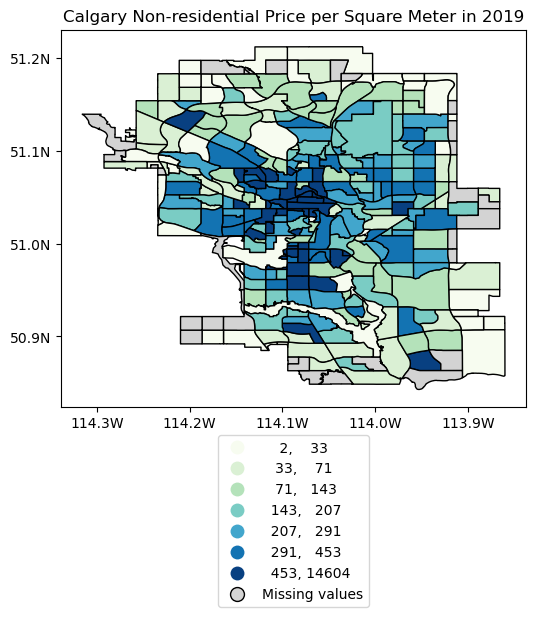

1       89.320260
2       88.494853
3      401.190031
4      215.883378
5       24.872532
          ...    
305      4.757258
306    207.718575
307    146.600036
308    215.800233
310    178.216677
Name: NR_UNIT_PRICE, Length: 271, dtype: float64

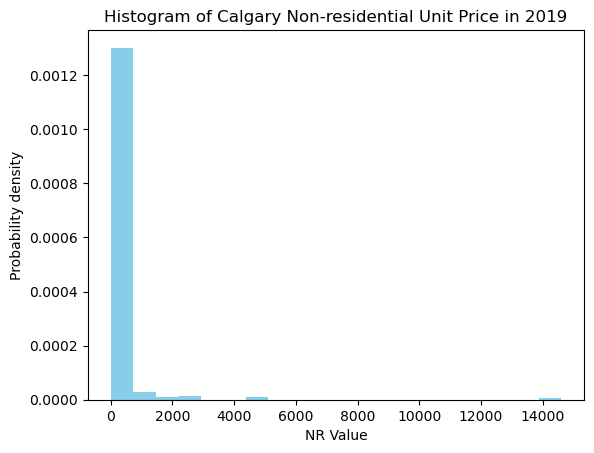

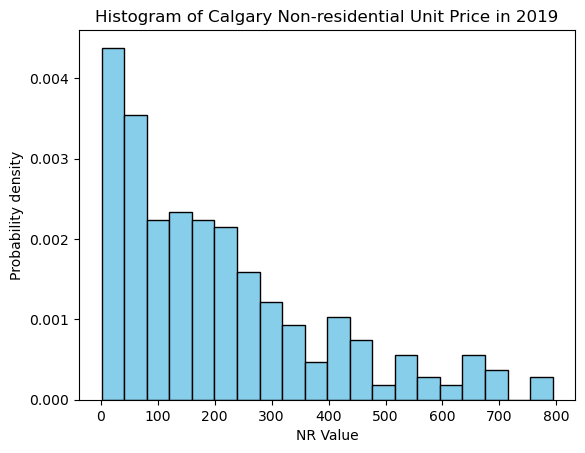

In [15]:
# NR plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6,8)
p = gdf1.plot(column="NR_UNIT_PRICE",ax=ax,edgecolor="k",cmap='GnBu',legend=True,scheme='quantiles',k=7,
              missing_kwds={
        "color": "lightgrey",
        "edgecolor": "k",
        "label": "Missing values",
    },
    legend_kwds={"loc": "lower center", "bbox_to_anchor": (0.5, -0.55), "fmt": "{:.0f}"})
ax.set_xticks([-114.3,-114.2,-114.1,-114.0,-113.9],labels = ['114.3W','114.2W','114.1W','114.0W','113.9W'])
ax.set_yticks([50.9,51.0,51.1,51.2,],labels = ['50.9N','51.0N','51.1N','51.2N',])
ax.set_title('Calgary Non-residential Price per Square Meter in 2019')
plt.show()
fig.savefig('NR Unit price spatial distribution.png',dpi=400)

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(gdf1["NR_UNIT_PRICE"], 20, density=True,color='skyblue',)
ax.set_xlabel('NR Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of Calgary Non-residential Unit Price in 2019')
# fig.savefig('NR Unit price histogram.png',dpi=400)

# plot with outliers removed
x = gdf1[gdf1["NR_UNIT_PRICE"]<1000]["NR_UNIT_PRICE"]
display(x)

fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, 20, density=True,color='skyblue',edgecolor='k')
ax.set_xlabel('NR Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of Calgary Non-residential Unit Price in 2019')
fig.savefig('NR Unit price histogram update.png',dpi=400)

11     5.956623
237    0.086918
31     0.086536
244    0.086488
167    0.086458
         ...   
303         NaN
304         NaN
307         NaN
310         NaN
311         NaN
Name: FL_UNIT_PRICE, Length: 312, dtype: float64
   COMM_CODE       CLASS CLASS_CODE                     NAME     SECTOR SRG  \
11       SRI  Industrial          2  SADDLE RIDGE INDUSTRIAL  NORTHEAST       

   COMM_STRUCTURE  CREATED_DT MODIFIED_DT  \
11     EMPLOYMENT  2016/12/21  2016/12/21   

                                         MULTIPOLYGON  RE_VALUE  RE_AREA  \
11  MULTIPOLYGON (((-113.97388 51.11180, -113.9730...       NaN      NaN   

    RE_UNIT_PRICE      NR_VALUE       NR_AREA  NR_UNIT_PRICE       FL_VALUE  \
11            NaN  3.272028e+06  21909.730882     149.341311  102706.666667   

         FL_AREA  FL_UNIT_PRICE geometry  
11  17242.433333       5.956623     None  


/Users/cesar/miniconda3/envs/geocat/lib/python3.11/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


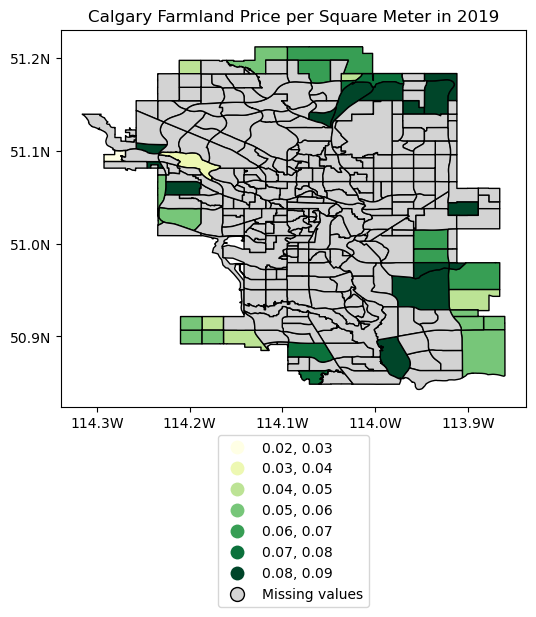

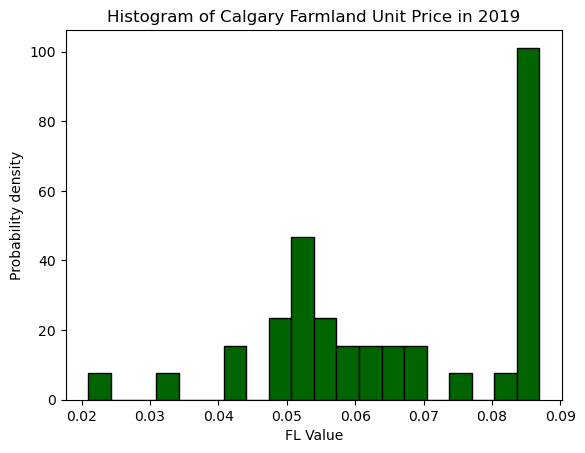

In [16]:
# FL plot
print(gdf1['FL_UNIT_PRICE'].sort_values(ascending=False))
print(gdf1[gdf1['FL_UNIT_PRICE']== gdf1['FL_UNIT_PRICE'].max()])
gdf2 = gdf1
gdf2.loc[11,['FL_VALUE','FL_AREA','FL_UNIT_PRICE']] = np.nan

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6,8)
p = gdf2.plot(column="FL_UNIT_PRICE",ax=ax,edgecolor="k",cmap='YlGn',legend=True,scheme='equal_interval',k=7,
              missing_kwds={
        "color": "lightgrey",
        "edgecolor": "k",
        "label": "Missing values",
    },
    legend_kwds={"loc": "lower center", "bbox_to_anchor": (0.5, -0.55), "fmt": "{:.2f}"})
ax.set_xticks([-114.3,-114.2,-114.1,-114.0,-113.9],labels = ['114.3W','114.2W','114.1W','114.0W','113.9W'])
ax.set_yticks([50.9,51.0,51.1,51.2,],labels = ['50.9N','51.0N','51.1N','51.2N',])
ax.set_title('Calgary Farmland Price per Square Meter in 2019')
plt.show()
fig.savefig('FL Unit price spatial distribution update.png',dpi=400)

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(gdf2["FL_UNIT_PRICE"], 20, density=True,color='darkgreen',edgecolor='k')
ax.set_xlabel('FL Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of Calgary Farmland Unit Price in 2019')
fig.savefig('FL Unit price histogram update.png',dpi=400)

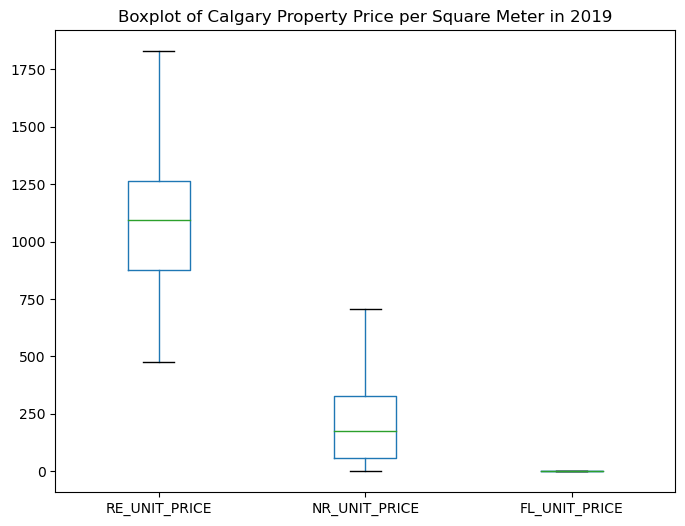

In [17]:
#boxplot for three categories
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8,6)

boxplot = df2.boxplot(column=['RE_UNIT_PRICE','NR_UNIT_PRICE','FL_UNIT_PRICE'],sym='',ax=ax)
ax.set_title('Boxplot of Calgary Property Price per Square Meter in 2019')
plt.grid(False)
fig.savefig('Boxplot Unit price.png',dpi=400)
# df2.boxplot(column=['RE_UNIT_PRICE','NR_UNIT_PRICE','FL_UNIT_PRICE'])


216    9.316000e+06
178    4.390000e+06
126    2.140297e+06
124    2.011378e+06
203    1.832763e+06
179    1.739527e+06
94     1.625930e+06
180    1.591650e+06
127    1.527422e+06
128    1.418591e+06
74     1.233762e+06
199    1.214874e+06
101    1.152937e+06
141    1.107328e+06
132    1.097745e+06
153    1.069815e+06
102    1.062124e+06
300    1.059844e+06
142    1.035420e+06
95     9.634401e+05
Name: RE_VALUE, dtype: float64


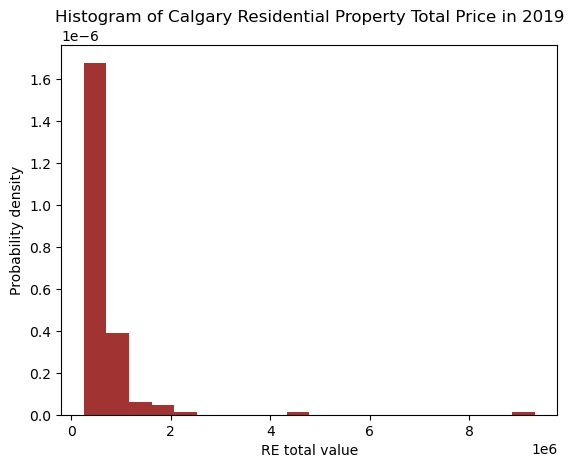

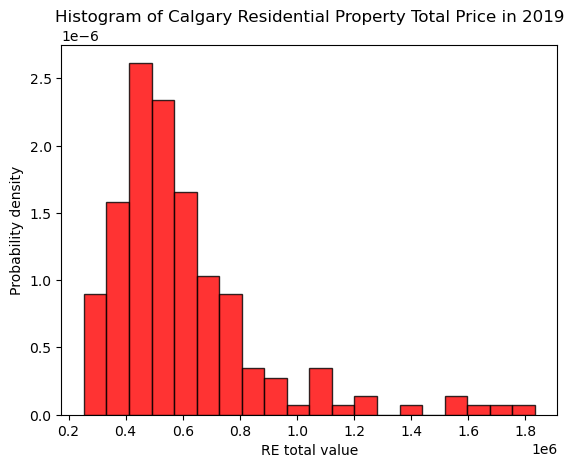

In [18]:
# RE total price and size
# the histogram of the data
print(df2['RE_VALUE'].sort_values(ascending=False).head(20))
df2_re = df2[df2['RE_VALUE']<2e+06]

fig, ax = plt.subplots()
n, bins, patches = ax.hist(df2["RE_VALUE"], 20, density=True,color='darkred',alpha=0.8)
ax.set_xlabel('RE total value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of Calgary Residential Property Total Price in 2019')
plt.show()
fig.savefig('RE total price histogram original.png',dpi=400)

# plot with outliers removed
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df2_re["RE_VALUE"], 20, density=True,color='red',alpha=0.8,edgecolor='k')
ax.set_xlabel('RE total value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of Calgary Residential Property Total Price in 2019')
plt.show()
fig.savefig('RE total price histogram update.png',dpi=400)

216    55974.720000
178    25790.000000
69      3849.025769
203     1588.687629
268     1585.433333
126     1354.494937
228     1169.400000
142     1066.245287
199      990.050314
141      959.371078
124      958.601938
180      944.960000
179      765.942771
95       762.046707
207      732.437815
160      707.791339
130      705.152326
154      705.124946
145      700.200000
176      692.914007
Name: RE_AREA, dtype: float64
978.9991675078466


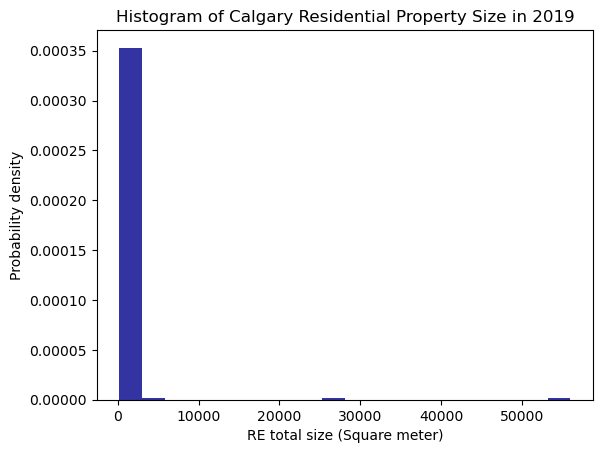

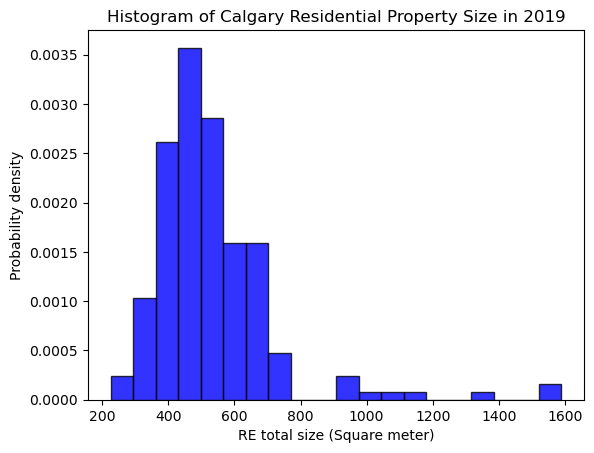

In [19]:
# RE size
# the histogram of the data
print(df2['RE_AREA'].sort_values(ascending=False).head(20))
df_size = df2[df2['RE_AREA']<2e+03]

print(df2['RE_AREA'].mean())

fig, ax = plt.subplots()
n, bins, patches = ax.hist(df2["RE_AREA"], 20, density=True,color='darkblue',alpha=0.8)
ax.set_xlabel('RE total size (Square meter)')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of Calgary Residential Property Size in 2019')
plt.show()
fig.savefig('RE total size histogram original.png',dpi=400)

# plot with outliers removed
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df_size["RE_AREA"], 20, density=True,color='blue',alpha=0.8,edgecolor='k')
ax.set_xlabel('RE total size (Square meter)')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of Calgary Residential Property Size in 2019')
plt.show()
fig.savefig('RE total size histogram update.png',dpi=400)

In [257]:
# top 10 most expensive residential property and top 10 cheapest residential property
display(df2.sort_values('RE_VALUE',ascending=False)[['COMM_CODE','CLASS','RE_VALUE','RE_AREA','RE_UNIT_PRICE']].head(10))
display(df2.sort_values('RE_VALUE',ascending=True)[['COMM_CODE','CLASS','RE_VALUE','RE_AREA','RE_UNIT_PRICE']].head(10))

,COMM_CODE,CLASS,RE_VALUE,RE_AREA,RE_UNIT_PRICE
216,RED,Residential,9.316000e+06,55974.720000,166.432275
178,MDH,Residential,4.390000e+06,25790.000000,170.221016
126,BEL,Residential,2.140297e+06,1354.494937,1580.144311
124,BRT,Residential,2.011378e+06,958.601938,2098.241019
203,EAG,Residential,1.832763e+06,1588.687629,1153.633259
179,UMR,Residential,1.739527e+06,765.942771,2271.092795
94,RID,Residential,1.625930e+06,630.398529,2579.209930
180,CLI,Residential,1.591650e+06,944.960000,1684.357010
127,EPK,Residential,1.527422e+06,681.170565,2242.348329
128,ROX,Residential,1.418591e+06,658.609756,2153.918083


,COMM_CODE,CLASS,RE_VALUE,RE_AREA,RE_UNIT_PRICE
290,BLM,Residential,254035.555556,312.479111,812.968120
33,LIV,Residential,284626.395534,307.576077,925.385351
232,SET,Residential,290325.459318,280.896588,1033.567056
268,12A,Residual Sub Area,295333.333333,1585.433333,186.279251
197,FHT,Residential,298137.671681,472.139961,631.460364
224,ABB,Residential,302865.032487,399.142056,758.790081
225,PEN,Residential,304062.148338,470.215754,646.643898
198,DOV,Residential,304544.989099,430.138517,708.016085
223,FAL,Residential,305400.462963,383.856061,795.611935
201,ERI,Residential,306714.321608,351.817437,871.799659
